# t-SNE of Brain Cancer Data

## About the Dataset

This project uses the GSE50161 dataset from the Curated Microarray Database (CuMiDa), which contains brain cancer gene expression data. The dataset includes:

- **5 Classes**: Different types of brain cancer and healthy tissue.
- **54,676 Genes**: Gene expression levels measured across samples.
- **130 Samples**: Each row represents a sample, and each column represents a gene.

### Dataset Source

CuMiDa is a carefully curated repository containing 78 cancer microarray datasets specifically designed for machine learning research. These datasets have been selected from over 30,000 studies in the Gene Expression Omnibus (GEO) and have undergone extensive biological preprocessing, including background correction and normalization, to ensure data reliability.

The GSE50161 dataset, like others in CuMiDa, is intended to serve as a reliable source for computational research, providing preprocessed data along with benchmark results for machine learning studies in cancer research. The dataset is available in various formats, including CSV, TAB, and ARFF, and also includes PCA and t-SNE results.

More details and the dataset are available at the official CuMiDa website under the ID GSE50161: [CuMiDa - GSE50161](http://sbcb.inf.ufrgs.br/cumida).

## Project Overview

This project focuses on applying t-SNE (t-distributed Stochastic Neighbor Embedding), a machine learning technique for dimensionality reduction, to visualize the gene expression data from the GSE50161 dataset. The goal is to represent the high-dimensional gene expression data in a 2D space, making it easier to observe patterns and similarities between different types of brain cancer.

## Source

This dataset is available on Kaggle in the following link:
> https://www.kaggle.com/datasets/brunogrisci/brain-cancer-gene-expression-cumida/data


## Data Dictionary

- **samples**: This is the unique ID of each sample. This is numeric.
- **type**: This is the type of breast cancer. It contanins 5 types of cancer and *normal* represents the healthy tissue. This is categorical.
- **1007_s_at** to **AFFX-TrpnX-M_at**: These features represent genes expression levels measured across each sample. These are numeric.

## Problem Statement

1. **Exploratory Data Analysis(EDA)**: The objective of EDA is to analyze the data, uncover patterns and relationships among the features to detect the calss or type of brain cancer.
2. **t-SNE**: It reduces the dimension of the dataset and visualize each type of brain cancer efficiently as the dataset is very high dimensional.

### Load Libraries

In [1]:
# General
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings

# Others
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

### Settings

In [3]:
# Warnings
warnings.filterwarnings("ignore")

# Plotting
sns.set_style("darkgrid")

# Path
data_path = "../data"
csv_path = os.path.join(data_path, "Brain_GSE50161.csv")

### Load Data

In [4]:
df = pd.read_csv(csv_path)

### General Information

In [5]:
# Show 1st 5 rows to get an idea about the data stored in each feature
df.head()

,samples,type,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,...,AFFX-r2-Ec-bioD-3_at,AFFX-r2-Ec-bioD-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
0,834,ependymoma,12.498150,7.604868,6.880934,9.027128,4.176175,7.224920,6.085942,6.835999,...,9.979005,9.926470,12.719785,12.777792,5.403657,4.870548,4.047380,3.721936,4.516434,4.749940
1,835,ependymoma,13.067436,7.998090,7.209076,9.723322,4.826126,7.539381,6.250962,8.012549,...,11.924749,11.215930,13.605662,13.401342,5.224555,4.895315,3.786437,3.564481,4.430891,4.491416
2,836,ependymoma,13.068179,8.573674,8.647684,9.613002,4.396581,7.813101,6.007746,7.178156,...,12.154405,11.532460,13.764593,13.477800,5.303565,5.052184,4.005343,3.595382,4.563494,4.668827
3,837,ependymoma,12.456040,9.098977,6.628784,8.517677,4.154847,8.361843,6.596064,6.347285,...,11.969072,11.288801,13.600828,13.379029,4.953429,4.708371,3.892318,3.759429,4.748381,4.521275
4,838,ependymoma,12.699958,8.800721,11.556188,9.166309,4.165891,7.923826,6.212754,6.866387,...,11.411701,11.169317,13.751442,13.803646,4.892677,4.773806,3.796856,3.577544,4.504385,4.541450


In [6]:
# Data Description
print("=" * 60)
print("DATA DESCRIPTION")
print("=" * 60)
print(f"Number of observations: {df.shape[0]}")
print(f"Number of features: {df.shape[1]}")

DATA DESCRIPTION
Number of observations: 130
Number of features: 54677


In [7]:
# Feature description
print("=" * 60)
print("FEATURE DESCRIPTION")
print("=" * 60)
print(df.dtypes)
print("-"*60)
# Separate categorical and numerical features
cat_cols = [ col for col in df.columns if df[col].dtype == "object"]
num_cols = [ col for col in df.columns if df[col].dtype != "object"]
print(f"Number of categorical features: {len(cat_cols)}")
print(f"Number of numerical features: {len(num_cols)}")

FEATURE DESCRIPTION
samples              int64
type                object
1007_s_at          float64
1053_at            float64
117_at             float64
                    ...   
AFFX-ThrX-5_at     float64
AFFX-ThrX-M_at     float64
AFFX-TrpnX-3_at    float64
AFFX-TrpnX-5_at    float64
AFFX-TrpnX-M_at    float64
Length: 54677, dtype: object
------------------------------------------------------------
Number of categorical features: 1
Number of numerical features: 54676


In [9]:
# Missing value detection
print("=" * 60)
print("MISSING VALUE DETECTION")
print("=" * 60)
if df.isnull().sum().sum() > 0:
    print(df.isnull().sum())
else:
    print("None of the features contain null values in these observation")

MISSING VALUE DETECTION
None of the features contain null values in these observation


In [13]:
# Duplicate value detection
print("=" * 60)
print("DUPLICATE ROW DETECTION")
print("=" * 60)
print(f"Number of duplicate rows: {df.duplicated().sum()}")

DUPLICATE ROW DETECTION
Number of duplicate rows: 0


In [14]:
# Check the distribution of type of brain cancer
df["type"].value_counts()

type
ependymoma               46
glioblastoma             34
medulloblastoma          22
pilocytic_astrocytoma    15
normal                   13
Name: count, dtype: int64

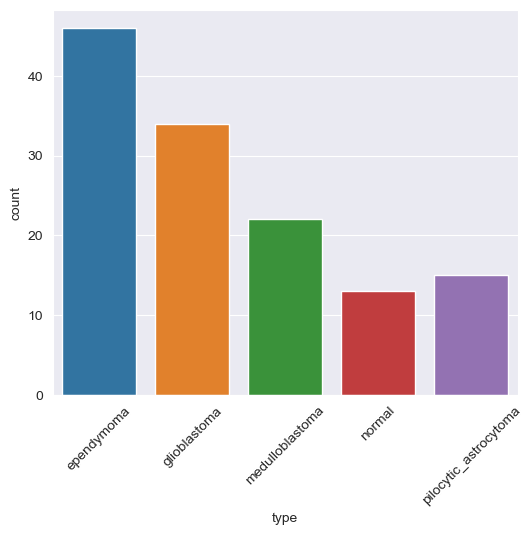

In [17]:
# Visualize the distribution of type
plt.figure(figsize= (6, 5))
sns.countplot(data=df, x= "type", hue="type")
plt.xticks(rotation= 45)
plt.show()

### Preprocessing

In [44]:
# Separate the genes
X= df.iloc[:, 2:]
y = df["type"]

In [19]:
# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### Dimensionality Reduction

In [26]:
# Apply t-SNE on scaled data
tsne = TSNE(random_state= 42, perplexity= 50, n_iter= 3000)
tsne_result_scaled = tsne.fit_transform(X_scaled)

In [27]:
# Separate 2 components of t-SNE result
xs = tsne_result_scaled[:, 0]
ys = tsne_result_scaled[:, 1]

<Axes: >

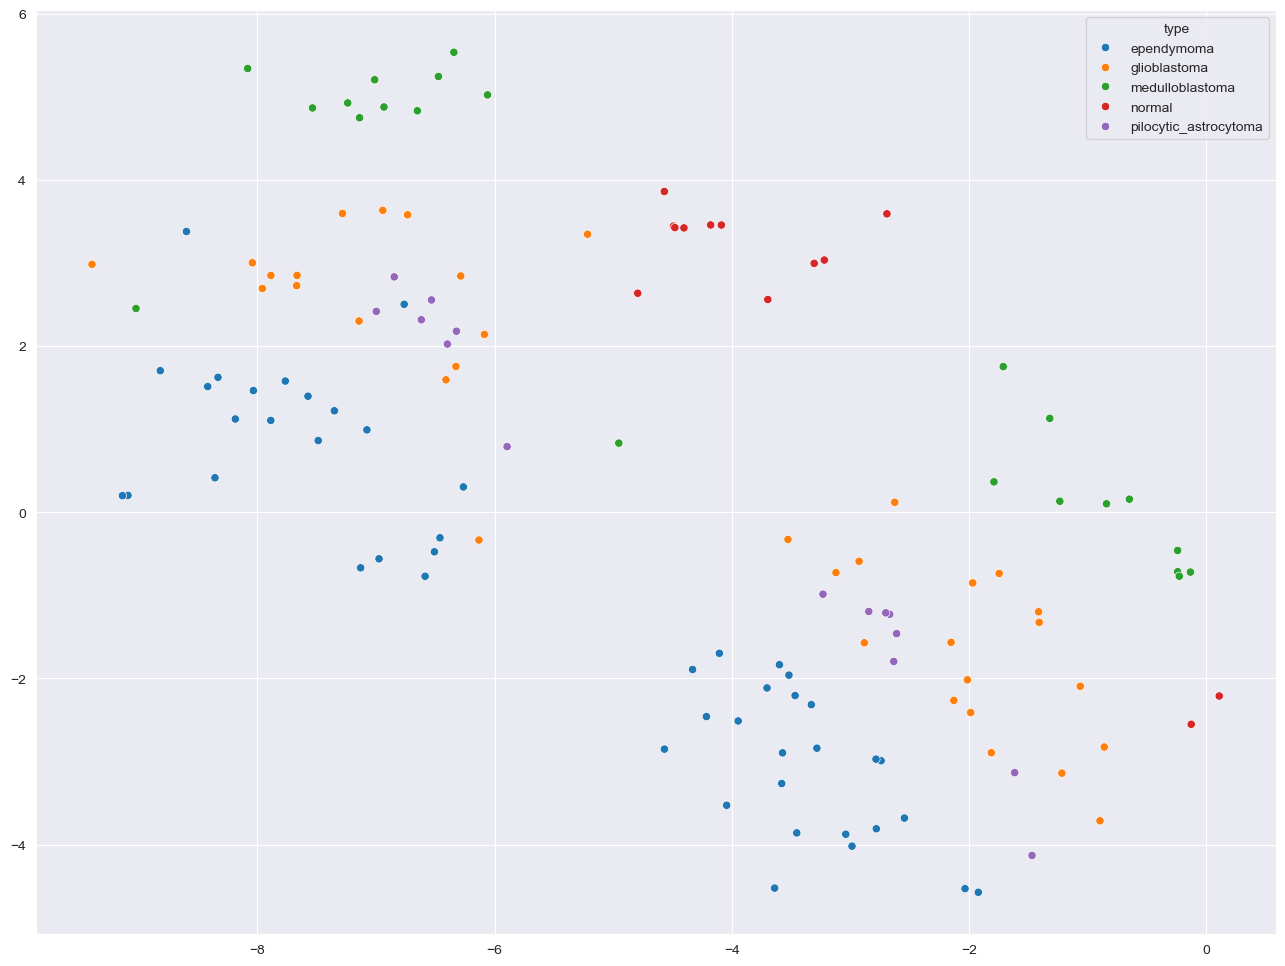

In [28]:
# Visualize the result after dimensionality reduction  with respect to type of cancer
plt.figure(figsize=(16, 12))
sns.scatterplot(
    x= xs,
    y= ys,
    hue= df["type"]
)

### Key Findings

From the above visualization it is clear that after dimensionalty reruction of scaled data using t-SNE all the calsses are overlapped. So variance of the data has not been preserved here.

In [50]:
# Apply t-SNE on data without scaling
tsne = TSNE(random_state= 42, perplexity=50, n_iter= 3000, n_components= 2)
tsne_result = tsne.fit_transform(X)

In [52]:
# Separate 2 components of t-SNE result
x = tsne_result[:, 0]
y = tsne_result[:, 1]

<Axes: >

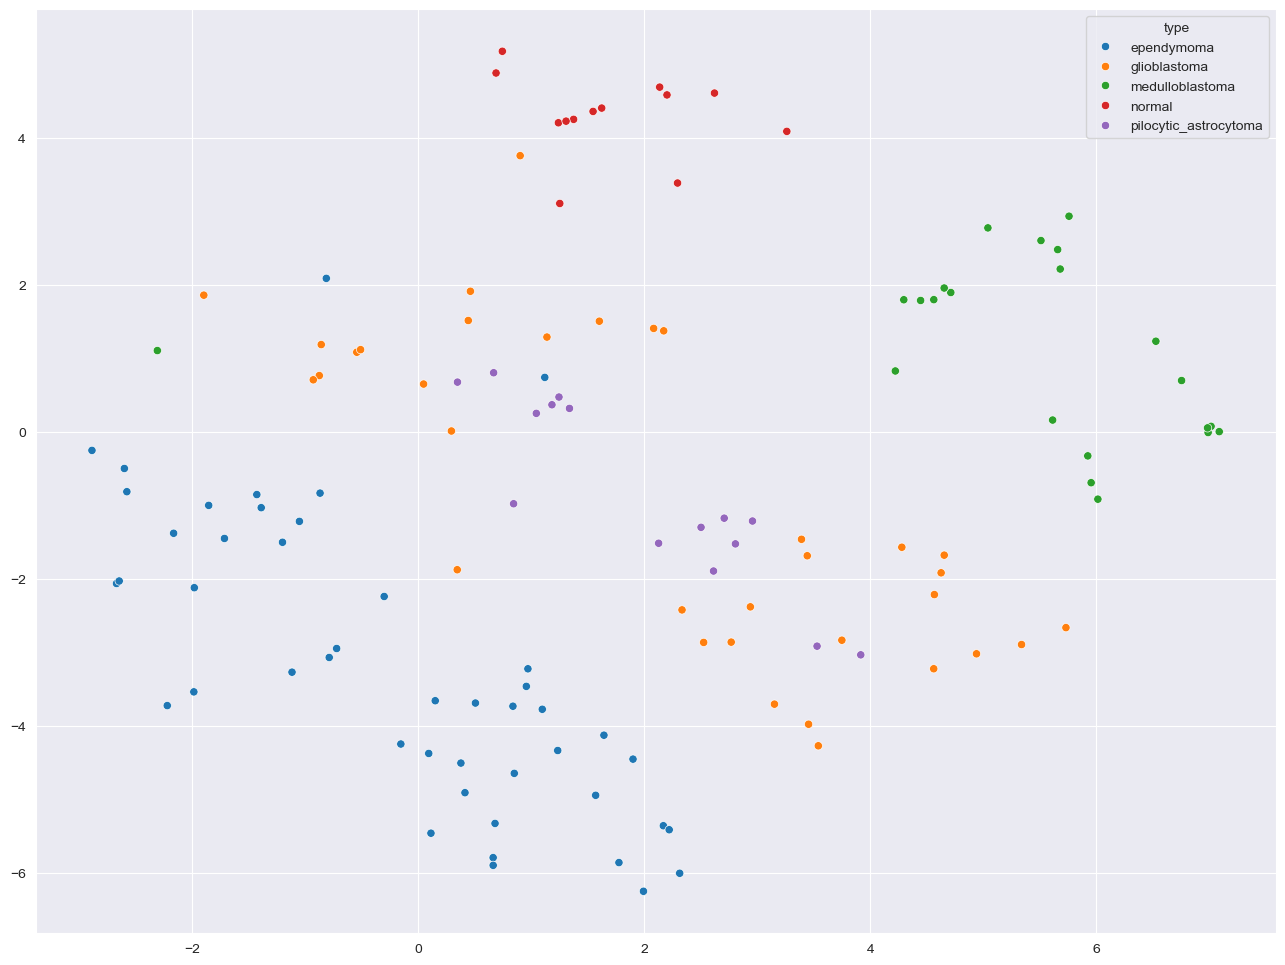

In [53]:
# Visualize the t-SNE result after dimensionality reduction with respect to type of cancer
plt.figure(figsize=(16, 12))
sns.scatterplot(
    x= x,
    y= y,
    hue= df["type"]
)

### Key Findings

- From above visualization after dimensionality reduction all **5** type s of brain cancer are clearly separated. The exceptions are **glioblastoma** and **pilocytic_astrocytoma** . They overlapped each other.